<a href="https://colab.research.google.com/github/ClarisseAlvarenga/data_science_alura_cursos/blob/master/Correla%C3%A7%C3%A3o_e_Regress%C3%A3o_Clarisse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

## Trabalho sobre correlação e regressão

Utilizando os conhecimentos adquiridos em nosso treinamento realize a análise de regressão proposta abaixo.

Siga o roteiro proposto e vá completando as células vazias.

# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **temp_media** - Temperatura Média (°C)
- **consumo** - Consumo de Cerveja (litros)


---

### Solução do problema com dependência do statsmodels

In [169]:
#!pip install scipy==1.2 --upgrade

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [170]:
#importando bibliotecas
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


### Importe o dataset

In [171]:
dados = pd.read_csv('dados_projeto.csv', sep=';')

### Visualize o conteúdo do DataFrame

In [172]:
dados.head()

,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82


In [173]:
dados.shape

(365, 2)

In [174]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       365 non-null    int64  
 1   X       365 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.8 KB


### Obtenha e avalie as estatísticas descritivas dos dados

In [175]:
dados.describe()

,Y,X
count,365.000000,365.000000
mean,25401.367123,21.226356
std,4399.142703,3.180108
min,14343.000000,12.900000
25%,22008.000000,19.020000
50%,24867.000000,21.380000
75%,28631.000000,23.280000
max,37937.000000,28.860000


### Análise gráfica
### Construa um box plot para cada variável do dataset

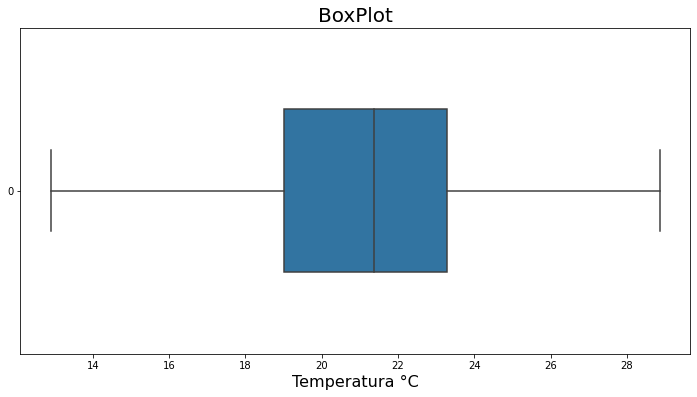

In [176]:
ax = sns.boxplot(data=dados.X, orient='h', width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Temperatura °C', fontsize=16)
ax.set_title('BoxPlot', fontsize=20)
ax

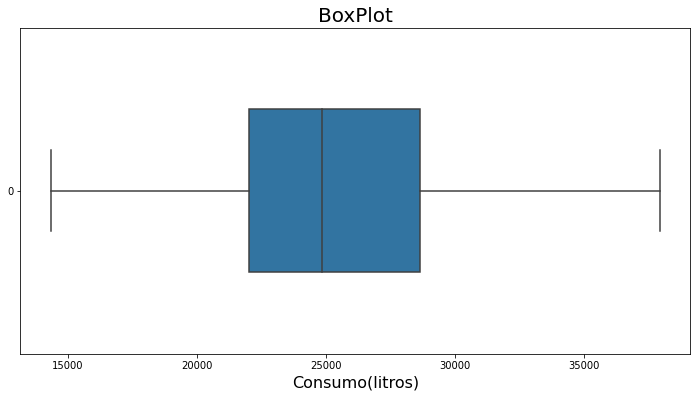

In [177]:
ax = sns.boxplot(data=dados.Y, orient='h', width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Consumo(litros)', fontsize=16)
ax.set_title('BoxPlot', fontsize=20)
ax

### Identifique se existe uma relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

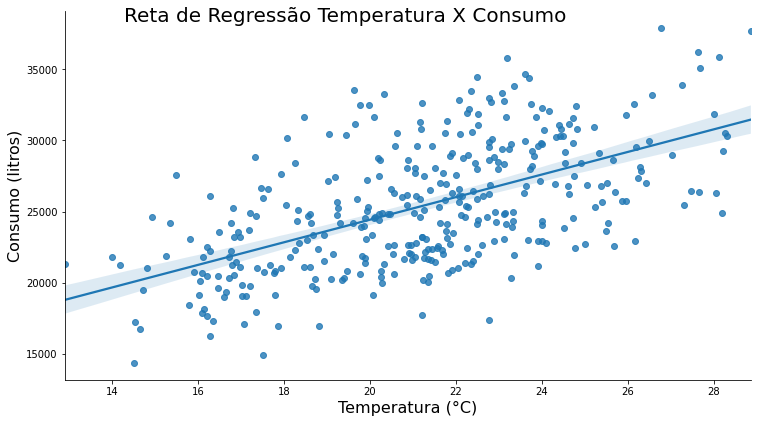

In [178]:
#usando o Lmplot
ax = sns.lmplot(x='X', y='Y', data=dados)
ax.fig.set_size_inches(12,6)
ax.set_xlabels('Temperatura (°C)', fontsize=16)
ax.set_ylabels('Consumo (litros)', fontsize=16)
ax.fig.suptitle('Reta de Regressão Temperatura X Consumo', fontsize=20)
ax

### <font color='red'>Utilizando a matriz de correlação</font>

In [179]:
dados.corr()

,Y,X
Y,1.000000,0.574615
X,0.574615,1.000000


### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?

Resp.: sim

É possível quantificar a intensidade dessa relação?

Resp.: sim, ela é mediana

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.:Não

### Prepare os dados para estimar um modelo de regressão linear simples

In [180]:
y = dados.Y
x = sm.add_constant(dados.X)

In [181]:
y.head()

0    25461
1    28972
2    30814
3    29799
4    28900
Name: Y, dtype: int64

In [182]:
x.head()

,const,X
0,1.0,27.30
1,1.0,27.02
2,1.0,24.82
3,1.0,23.98
4,1.0,23.82


### Estime o modelo de regressão linear simples

In [183]:
regressao = sm.OLS(y, x, missing='drop').fit()

### Visualize o resultado da regressão

In [184]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           1.87e-33
Time:                        20:23:03   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8528.9073   1275.363      6.687      0.0

### Obtenha o $Y$ previsto

In [185]:
dados['Y_previsto'] = regressao.predict(x)
dados.head()

,Y,X,Y_previsto
0,25461,27.30,30229.200544
1,28972,27.02,30006.633434
2,30814,24.82,28257.891852
3,29799,23.98,27590.190521
4,28900,23.82,27463.009315


### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [186]:
print(f'A previsão de consumo de cerveja num dia com temperatura média de 42°C é de {regressao.predict([1,42])[0].round(2)} litros')

A previsão de consumo de cerveja num dia com temperatura média de 42°C é de 41913.97 litros


### Obtenha os resíduos da regressão

In [187]:
#fazendo a conta
dados['u'] = dados.Y - dados.Y_previsto
dados.head()

,Y,X,Y_previsto,u
0,25461,27.30,30229.200544,-4768.200544
1,28972,27.02,30006.633434,-1034.633434
2,30814,24.82,28257.891852,2556.108148
3,29799,23.98,27590.190521,2208.809479
4,28900,23.82,27463.009315,1436.990685


In [188]:
dados['residuo'] = regressao.resid

In [189]:
#conferindo com o equals
dados.u.equals(dados.residuo)

True

In [190]:
#excluindo a coluna u
dados = dados.drop('u', axis=1)
dados

,Y,X,Y_previsto,residuo
0,25461,27.30,30229.200544,-4768.200544
1,28972,27.02,30006.633434,-1034.633434
2,30814,24.82,28257.891852,2556.108148
3,29799,23.98,27590.190521,2208.809479
4,28900,23.82,27463.009315,1436.990685
...,...,...,...,...
360,32307,24.00,27606.088172,4700.911828
361,26095,22.64,26525.047922,-430.047922
362,22309,21.68,25761.960686,-3452.960686
363,20467,21.38,25523.495925,-5056.495925


### Plote um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

Text(0, 0.5, 'Y_previsto')

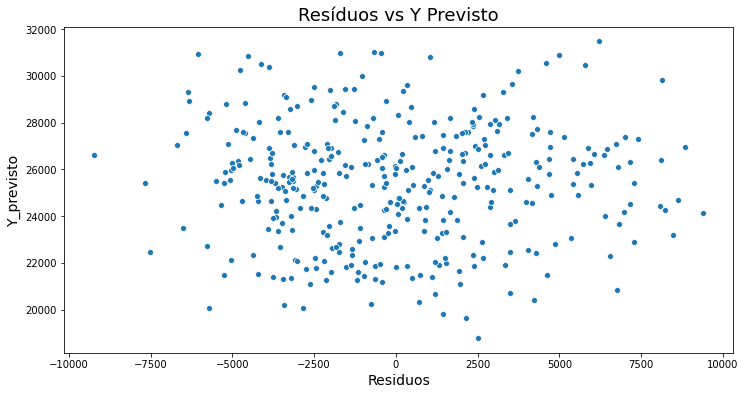

In [191]:
ax = sns.scatterplot(x=dados.residuo, y=dados.Y_previsto)
ax.figure.set_size_inches(12,6)
ax.set_title('Resíduos vs Y Previsto', fontsize=18)
ax.set_xlabel('Residuos', fontsize=14)
ax.set_ylabel('Y_previsto', fontsize=14)

Text(0.5, 0, 'Y_previsto')

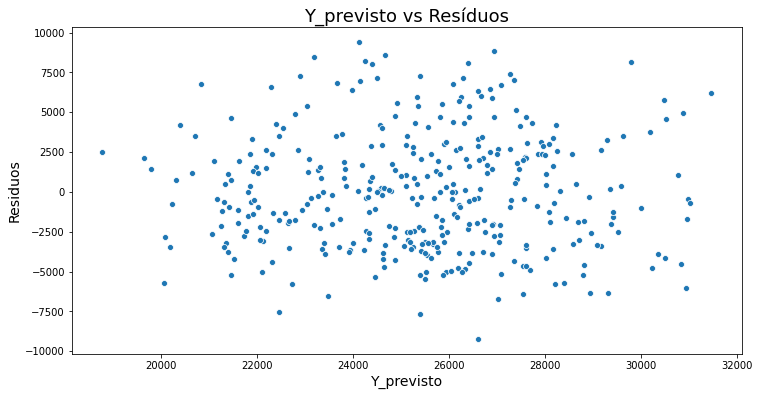

In [192]:
#trocando os eixos
ax = sns.scatterplot(y=dados.residuo, x=dados.Y_previsto)
ax.figure.set_size_inches(12,6)
ax.set_title('Y_previsto vs Resíduos', fontsize=18)
ax.set_ylabel('Residuos', fontsize=14)
ax.set_xlabel('Y_previsto', fontsize=14)

### Obtenha o QQPlot dos resíduos

In [193]:
#usando o probplot
from scipy.stats import probplot

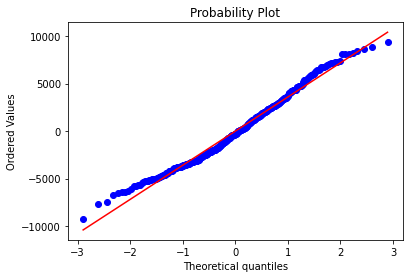

In [194]:
(_,(_,_,_)) = probplot(dados.residuo, plot = plt)

Text(0, 0.5, 'Resíduos²')

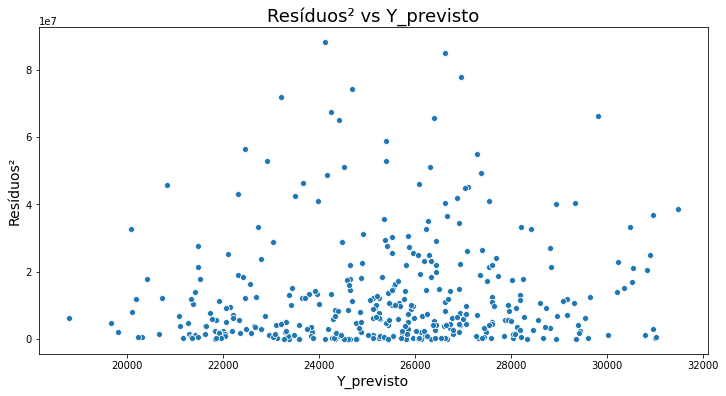

In [195]:
ax = sns.scatterplot(x=dados.Y_previsto, y=dados.residuo**2)
ax.figure.set_size_inches(12,6)
ax.set_title('Resíduos² vs Y_previsto', fontsize=18)
ax.set_xlabel('Y_previsto', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)

### <font color='red'>A partir dos outputs acima, qual conclusão podemos tirar sobre o comportamento dos resíduos?</font>

### Obtenha o R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$

In [196]:
#criando a soma dos quadrados dos erros
SQE = dados.residuo.apply(lambda u: u**2).sum()
SQE

4718394688.067692

In [197]:
#criando a soma dos quadrados Total
SQT = dados.Y.apply(lambda y: (y - dados.Y.mean())**2).sum()
SQT

7044294174.805479

In [198]:
#criando a soma dos quadrados da regressão
SQR = dados.Y_previsto.apply(lambda y: (y - dados.Y.mean())**2).sum()
SQR

2325899486.7377872

In [199]:
#sobrescrevendo o SQE e o SQR com os comandos do statsmodels
# SQE = usando o ssr(sum of squared residuals) do statsmodels
SQE = regressao.ssr
SQE


4718394688.067693

In [200]:
#SQR = utilizando o ess (explained sum of squares) do statsmodels
SQR = regressao.ess
SQR

2325899486.7377863

In [201]:
#calculando o R²
r_2 = SQR/SQT
r_2

0.33018204933243206

In [202]:
#usando a função do statsmodels
regressao.rsquared

0.330182049332432

### Testes Extras

#### Erro Quadrático Médio

In [203]:
#calculando com o Statsmodels
EQM = regressao.mse_resid
EQM

12998332.474015683

#### Teste de Hipótese de nulidade do coeficiente angular (beta_2)

Considere o seguinte modelo de regressão linear simples:

# $$Y_i = \beta_1 + \beta_2X_i + u_i$$

Se as variáveis $Y$ e $X$ são linearmente relacionadas, espera-se que $\beta_2$ seja diferente de zero. Para testar esta hipótese formulamos um teste de hipótese com a seguinte especificação de hipóteses nula e alternativa:

## $H_0: \beta_2 = 0$
## $H_1: \beta_2 \neq 0$

Caso $H_0$ seja rejeitada, concluiremos que existe uma relação linear estatisticamente significativa entre as duas variáveis.

Considere agora que $b_1$ e $b_2$ são nossos estimadores de mínimos quadrados. Considere que a distribuição amostral de $b_2$ segue uma normal e também as seguintes propriedades:

# $$E(b_2) = \beta_2$$
# $$\sigma_{b_2} = \frac{\sigma}{\sqrt{\sum{(X_i - \bar{X})^2}}}$$

Como não conhecemos o valor de $\sigma$, utilizamos $s$ como estimativa:

# $$s_{b_2} = \frac{s}{\sqrt{\sum{(X_i - \bar{X})^2}}}$$

Note que o valor esperado de $b_2$ é $\beta_2$, logo, $b_2$ é um estimador não viesado de $\beta_2$. Abaixo temos a estatística de teste (t) que segue uma distribuição t de Student com $n-2$ graus de liberdade.

# $$t = \frac{b_2 - \beta_2}{s_{b_2}}$$

**informação importante**

- $\beta_1$ é conhecido como intercepto (no modelo teórico acima é conhecido como consumo autônomo, ou seja, o consumo quando o rendimento é zero)

- $\beta_2$ é o coefiente angular (no modelo teórico é a propensão marginal a consumir)

In [204]:
#obtendo beta_1 e beta_2
regressao.params

const    8528.907284
X         794.882537
dtype: float64

In [205]:
#o intercepto é a primeira posição do params (equivalente ao const)
beta_1 = regressao.params[0]
beta_1

8528.9072839855

In [206]:
#o coeficiente angular é a segunda posição do params
beta_2 = regressao.params[1]
beta_2

794.8825370043044

In [207]:
#calculando o s
s = np.sqrt(EQM) #raiz quadrada do erro quadrático médio
s

3605.3200238003396

In [208]:
#calculando a soma do desvio ao quadrado
SOMA_DESVIO2 = dados.X.apply(lambda x: (x - dados.X.mean())**2).sum()
SOMA_DESVIO2

3681.162853698631

In [209]:
#calculando o s de beta_2
s_beta_2 = s/np.sqrt(SOMA_DESVIO2)
s_beta_2

59.422552791489785

In [210]:
#obtendo o t de student
from scipy.stats import t as t_student

In [211]:
#determinando a área de rejeição da hipótese bem como os graus de liberdade e confianca
confianca = 0.95
significancia = 1 - confianca
graus_de_liberdade = regressao.df_resid
graus_de_liberdade


363.0

In [212]:
#obtendo a probabilidade para um teste bicaudal
probabilidade = (0.5 + (confianca/2))

In [213]:
#obtendo o t_alpha_2 (teste bicaudal) para comparar com o t de teste - usando função do statsmodels
t_alpha_2 = t_student.ppf(probabilidade, graus_de_liberdade)
t_alpha_2
#O t_alpha_2 define a área de rejeição da hipótese

1.9665206405682956

In [214]:
#fazendo o cálculo estatístico usando a fórmula acima
t = (beta_2 - 0)/(s_beta_2)
t

13.376782040877645

In [215]:
#calculando com o statsmodels
regressao.tvalues

const     6.687435
X        13.376782
dtype: float64

In [216]:
#como queremos testar a variável explicativa, usamos a segunda posição
t = regressao.tvalues[1]
t

13.376782040877645

### <font color='red'>Critério do valor crítico</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se $t \leq -t_{\alpha / 2}$ ou se $t \geq t_{\alpha / 2}$

In [217]:
t <= -t_alpha_2

False

In [218]:
t >= t_alpha_2
#Hipótese nula de que o coeficiente angular é igual a zero rejeitada

True

Usando o P_value

In [219]:
regressao.pvalues

const    8.598770e-11
X        1.866747e-33
dtype: float64

In [220]:
#queremos usar o X então
p_valor = regressao.pvalues[1]
p_valor

1.866747451945502e-33

In [221]:
#teste de hipótese de P_valor
p_valor <= significancia
#Hipótese nula rejeitada, logo concluimos que a temperatura ambiente explica ao menos em parte o consumo de cerveja em SP

True

##### <font color='green'>Conclusão: Rejeitamos $H_0$ e concluímos que existe uma relação significativa entre as duas variáveis.</font>

### Usando o teste F (apesar de não ser tão relevante por só estarmos tratando de uma variável explicativa)

O teste F também é uma ferramenta para testar a significância na regressão. Baseado na distribuição F de probabilidade, o teste F é utilizado para verificar a significância global na regressão, isto é, em uma regressão múltipla, onde existe mais de uma variável independente, o teste F verifica a nulidade de todos os parâmetros do modelo conjuntamente.

Em nosso caso (regressão linear simples) ele fornece a mesma conclusão obtida com o teste t.

**Hipóteses:**

## $H_0: \beta_2 = 0$
## $H_0: \beta_2 \neq 0$

**Estatística de teste:**

# $$F = \frac{\frac{SQR}{k}}{\frac{SQE}{n-k-1}}$$

Onde,

$SQR$ - soma dos quadrados da regressão

$SQE$ - soma dos quadrados dos erros

$k$ - total de variáveis independentes ($X$)

**Regras de rejeição de $H_0$:**

**Critério do valor crítico** $\rightarrow$ Rejeitar se $F \geq F_{\alpha}$

Onde,

$F_{\alpha}$ - baseia-se na distribuição F com $k$ graus de liberdade no numerador e $n-k-1$ no denominador.


In [222]:
#Obtendo o F
#k é  o número de variáveis independentes
k = 1
n= dados.shape[0]

F = (SQR/k)/(SQE/(n-k-1))
F

178.9382977691466

In [223]:
#outra maneira de conseguir o mesmo resultado:
F = regressao.mse_model/regressao.mse_resid
F

178.9382977691466

In [224]:
#e usando o statsmodels
regressao.fvalue

178.9382977691466

In [225]:
#obtendo o p_valor
p_valor_f = regressao.f_pvalue
p_valor_f

1.866747451945503e-33

In [226]:
#fazendo o teste de hipótese
p_valor_f <= significancia

True